STEP 1:


In [1]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [22]:
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/Titanic"
CHAPTER_ID = "Assignment 3"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

STEP 2:

In [8]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
%cd  /content/gdrive/My Drive/Titanic

/content/gdrive/My Drive/Titanic


In [16]:
titanic = pd.read_csv("gender_submission.csv")
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

STEP 3:

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Saving figure attribute_histogram_plots


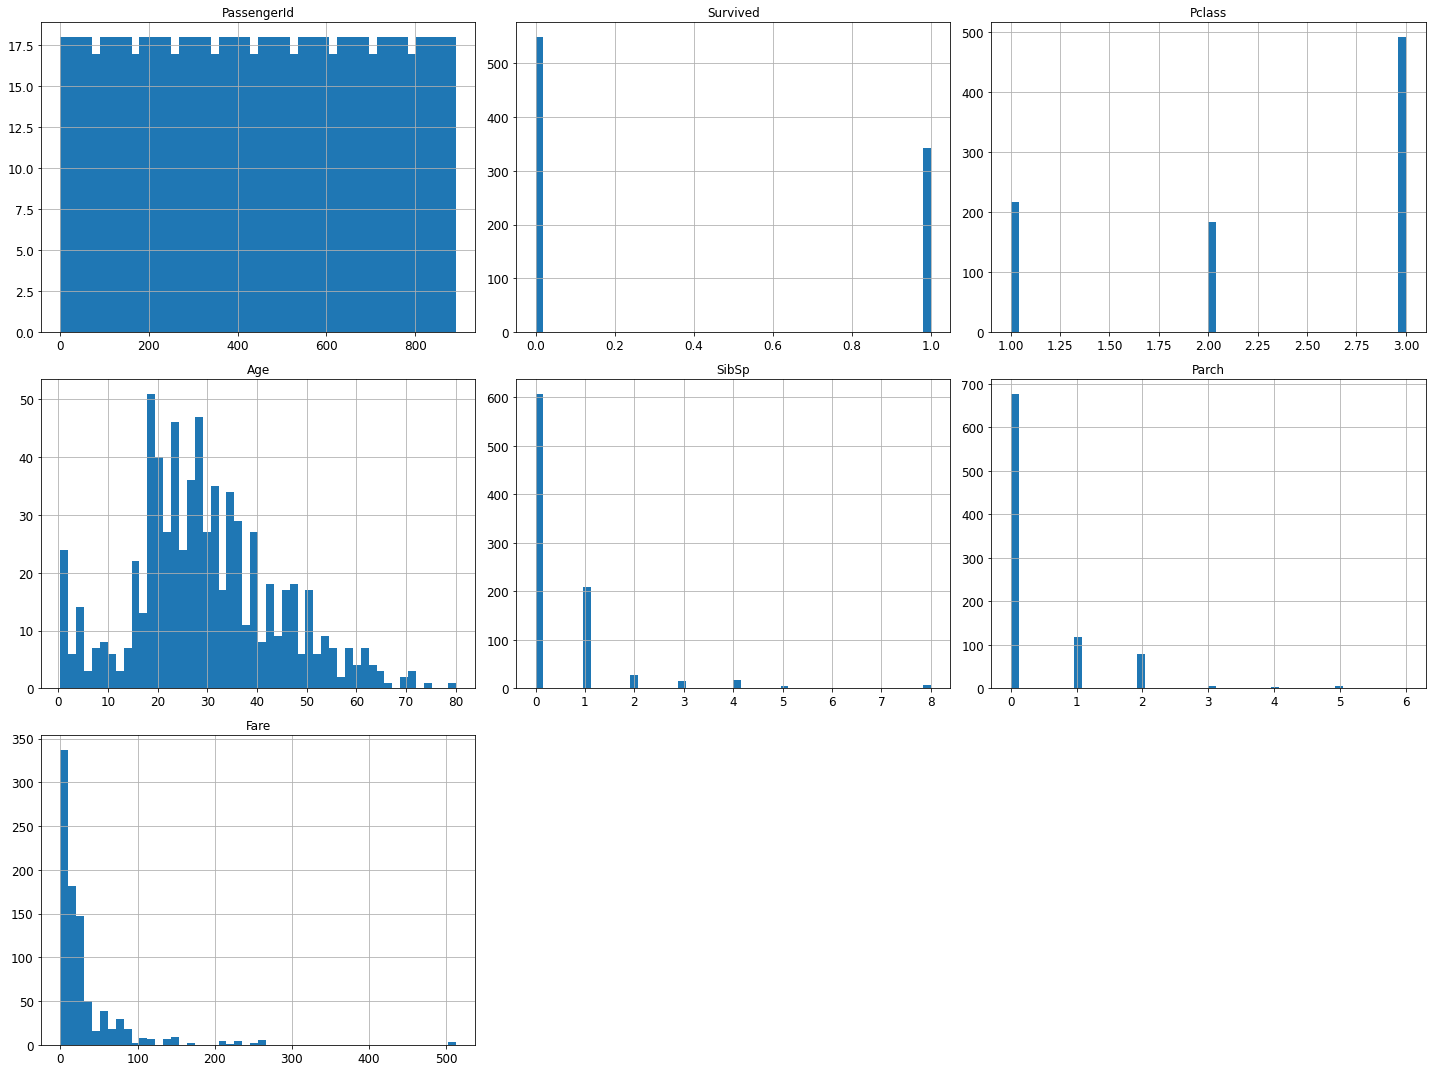

In [23]:
train_df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
# data is already split so no use calling train_test_split() 

STEP 4:

Saving figure visualization_plot


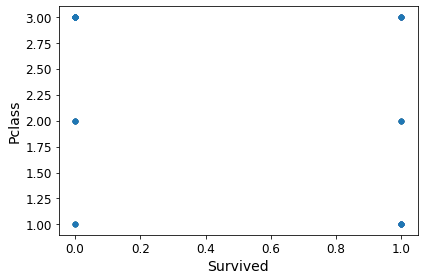

In [26]:
train_df.plot(kind="scatter", x="Survived", y="Pclass", alpha = 0.1)
save_fig("visualization_plot")

Saving figure visualization_plot


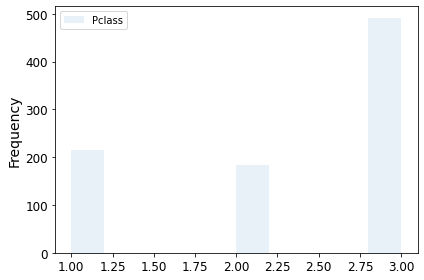

In [28]:
# scatter plot isn't giving enough info

train_df.plot(kind="hist", x="Survived", y="Pclass", alpha = 0.1)
save_fig("visualization_plot")

Saving figure titanic_barplot_simple


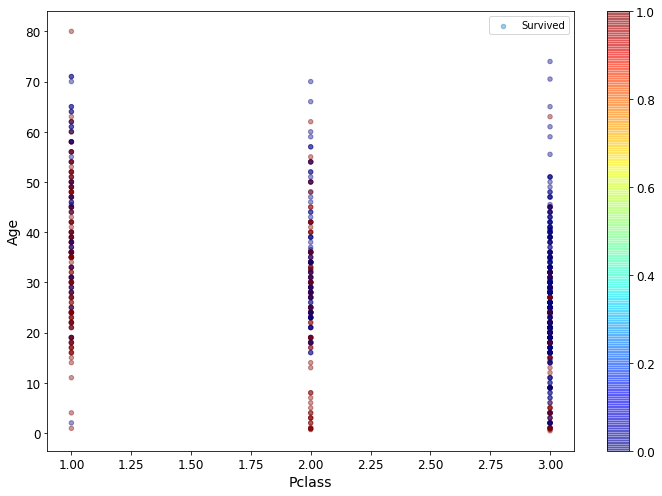

In [36]:
#adding age

train_df.plot(kind="scatter", x="Pclass", y="Age", alpha=0.4,
             c=train_df["Survived"], label="Survived", figsize=(10,7), cmap=plt.get_cmap("jet"),
             sharex=False)
plt.legend()
save_fig("titanic_barplot_simple")

In [38]:
# here we can see that there are max blue dots for Pclass = 3, lesser for Pclass = 2, least for Pclass = 1
# where blue represents survival and red represents death.
# for Pclass = 3, we see that the range of age for people who survived is approximately from 10 to 50

In [40]:
corr_matrix = train_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

STEP 5:


In [41]:
sample_incomplete_rows = train_df[train_df.isnull().any(axis=1)].head()
sample_incomplete_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [42]:
# cabin has NaNs
sample_incomplete_rows.drop("Cabin", axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S


In [43]:
# SimpleImputer is Imputation transformer for completing missing values. It replaces the NaN values with a specified placeholder.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [44]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# from the info above and in cell 8, we can assume that passenger id, cabin, name, ticket are to be omitted 
# as passenger id/name shouldn't have any effect on Survived, and cabin has too many Nan values 

In [50]:

train_df_num = train_df.drop("Cabin", axis=1)


In [53]:
train_df_num = train_df_num.drop("Name", axis=1)

In [58]:
train_df_num = train_df_num.drop("Ticket", axis=1)

In [54]:
train_df_num = train_df_num.drop("PassengerId", axis=1)


KeyError: ignored

In [59]:
# converting gender into numerics
genders = {"male": 0, "female": 1}
data = [train_df_num]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [64]:
# converting embarked into numerics
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df_num]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [65]:
imputer.fit(train_df_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [71]:
X = imputer.transform(train_df_num)
X

array([[ 0.    ,  3.    , 22.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  1.    ],
       [ 1.    ,  3.    , 26.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  3.    , 28.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  1.    ],
       [ 0.    ,  3.    , 32.    , ...,  0.    ,  7.75  ,  2.    ]])

In [72]:
train_df_num_labels = train_df_num["Survived"].copy()

STEP 6:

In [88]:
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

In [81]:
X_train = train_df_num.drop("Survived", axis=1)
Y_train = train_df_num["Survived"]

In [86]:
X_train[np.isnan(X_train)] = np.median(X_train[~np.isnan(X_train)])
Y_train[np.isnan(Y_train)] = np.median(Y_train[~np.isnan(Y_train)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.2, random_state=1)

In [93]:
#SVM

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.659217877094972


In [95]:
# default linear kernel (overfitting????)
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
1.0


In [96]:
# Default Gaussian/RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.659217877094972


In [97]:
# default polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.6145251396648045


STEP 7:

In [98]:
# let us take the Default Gaussian/RBF kernel and perform kfold validation
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.659217877094972


In [100]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, train_df_num_labels, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.62222222 0.58426966 0.68539326 0.74157303 0.69662921 0.70786517
 0.69662921 0.71910112 0.70786517 0.6741573 ]


In [101]:
print(scores.mean())

0.6835705368289637


In [102]:
scores = cross_val_score(svc, X, train_df_num_labels, cv=10, scoring='neg_mean_squared_error') #cv is cross validation
lin_rmse_scores = np.sqrt(-scores)

In [103]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [0.6146363  0.64477154 0.56089816 0.50835712 0.55079106 0.54049499
 0.55079106 0.52999894 0.54049499 0.57082633]
Mean: 0.5612060469994695
Standard deviation: 0.03843482772519547
